#Load image

In [ ]:
# import dependencies
from google.colab.patches import cv2_imshow
import numpy as np
import cv2


from google.colab import files
fn = files.upload()
img_path = list(fn.keys())[0]

original_img = cv2.imread(img_path)

Saving input.jpg to input.jpg


#Bounding box detection

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make

# get bthe scaled yolov4 weights file that is pre-trained to detect 80 classes (objects) from shared google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt


Cloning into 'darknet'...
remote: Enumerating objects: 15283, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15283 (delta 40), reused 50 (delta 26), pack-reused 15186
Receiving objects: 100% (15283/15283), 13.78 MiB | 20.33 MiB/s, done.
Resolving deltas: 100% (10351/10351), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wu

In [ ]:
cv2.imwrite('tmp_img_2021.png',original_img)
!gdown https://drive.google.com/uc?id=1L30qecCVPx9sGQQaCsZkszJm_IqQuSfE&export=download

!python apply_yolo.py

Downloading...
From: https://drive.google.com/uc?id=1L30qecCVPx9sGQQaCsZkszJm_IqQuSfE
To: /content/darknet/apply_yolo.py
100% 1.79k/1.79k [00:00<00:00, 1.91MB/s]
 Try to load cfg: cfg/yolov4-csp.cfg, weights: yolov4-csp.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 

In [ ]:
import numpy as np
blist = np.load('bbox.npy',allow_pickle=True)
bbox_list = [list(b) for b in blist]

bbox_list

[[286, 60, 78, 163],
 [536, 49, 103, 191],
 [166, 101, 192, 240],
 [0, 45, 90, 218],
 [366, 174, 272, 216]]

#ROOTNET

In [ ]:
%cd ..
!ls
!git clone https://github.com/mks0601/3DMPPE_ROOTNET_RELEASE.git

!ls
%cd 3DMPPE_ROOTNET_RELEASE
!ls

!ls demo
!rm demo/output_root_*.jpg
!ls demo

!ls main
!cp demo/*.* main
!ls main

%cd main
!ls

!gdown https://drive.google.com/uc?id=1heFZLbm1GEMOEjvBB5Z3nvVREwYSPuGe&export=download
!ls


/content
darknet  input.jpg  sample_data
Cloning into '3DMPPE_ROOTNET_RELEASE'...
remote: Enumerating objects: 479, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 479 (delta 16), reused 13 (delta 2), pack-reused 434
Receiving objects: 100% (479/479), 12.72 MiB | 38.88 MiB/s, done.
Resolving deltas: 100% (216/216), done.
3DMPPE_ROOTNET_RELEASE	darknet  input.jpg  sample_data
/content/3DMPPE_ROOTNET_RELEASE
assets	common	data  demo  LICENSE  main  README.md
demo.py    output_root_2d_0.jpg  output_root_2d_2.jpg  output_root_2d_4.jpg
input.jpg  output_root_2d_1.jpg  output_root_2d_3.jpg
demo.py  input.jpg
config.py  model.py  __pycache__  test.py  train.py
config.py  demo.py  input.jpg  model.py  __pycache__  test.py  train.py
/content/3DMPPE_ROOTNET_RELEASE/main
config.py  demo.py  input.jpg  model.py  __pycache__  test.py  train.py
Downloading...
From: https://drive.google.com/uc?id=1heFZLbm1GEMOEjvBB5Z3nvVREwYSPuGe
To: 

>>> Using GPU: 0
Load checkpoint from ./snapshot_18.pth.tar
focal length: (1500, 1500)
principal points: (320.0, 196.0)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


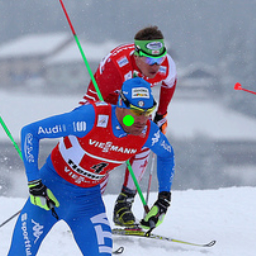

Root joint depth: 15760.063 mm


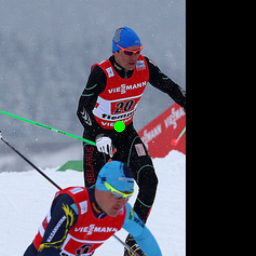

Root joint depth: 13008.28 mm


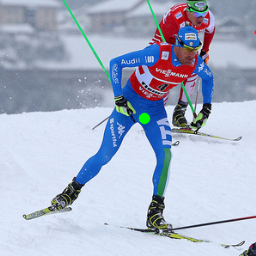

Root joint depth: 11515.877 mm


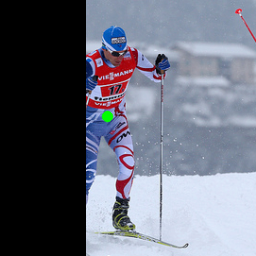

Root joint depth: 12356.488 mm


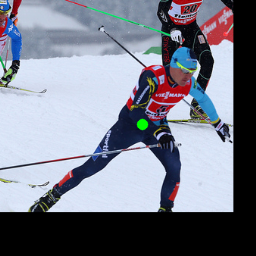

Root joint depth: 9066.119 mm


In [ ]:
import sys
import os
import os.path as osp
import argparse
import numpy as np
import cv2
import math
import torch
import torchvision.transforms as transforms
from torch.nn.parallel.data_parallel import DataParallel
import torch.backends.cudnn as cudnn

sys.path.insert(0, osp.join('..', 'main'))
sys.path.insert(0, osp.join('..', 'data'))
sys.path.insert(0, osp.join('..', 'common'))
# from config import cfg
import config

# from model import get_pose_net
import model 
from utils.pose_utils import process_bbox
# from dataset import generate_patch_image
import dataset

from google.colab.patches import cv2_imshow


cfg = config.cfg
cfg.set_args('0')
cudnn.benchmark = True

# snapshot load
model_path = './snapshot_%d.pth.tar' % int(18)
assert osp.exists(model_path), 'Cannot find model at ' + model_path
print('Load checkpoint from {}'.format(model_path))
model = model.get_pose_net(cfg, False)
model = DataParallel(model).cuda()
ckpt = torch.load(model_path)
model.load_state_dict(ckpt['network'])
model.eval()

# prepare input image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=cfg.pixel_mean, std=cfg.pixel_std)])
# img_path = 'input.jpg'
# original_img = cv2.imread(img_path)
original_img_height, original_img_width = original_img.shape[:2]

#bbox_list = #from Yolo
person_num = len(bbox_list) #from Yolo
root_params = []

# normalized camera intrinsics
focal = [1500, 1500] # x-axis, y-axis
princpt = [original_img_width/2, original_img_height/2] # x-axis, y-axis
print('focal length: (' + str(focal[0]) + ', ' + str(focal[1]) + ')')
print('principal points: (' + str(princpt[0]) + ', ' + str(princpt[1]) + ')')

# for cropped and resized human image, forward it to RootNet
for n in range(person_num):
    bbox = process_bbox(np.array(bbox_list[n]), original_img_width, original_img_height)
    img, img2bb_trans = dataset.generate_patch_image(original_img, bbox, False, 0.0) 
    img = transform(img).cuda()[None,:,:,:]
    k_value = np.array([math.sqrt(cfg.bbox_real[0]*cfg.bbox_real[1]*focal[0]*focal[1]/(bbox[2]*bbox[3]))]).astype(np.float32)
    k_value = torch.FloatTensor([k_value]).cuda()[None,:]

    # forward
    with torch.no_grad():
        root_3d = model(img, k_value) # x,y: pixel, z: root-relative depth (mm)
    img = img[0].cpu().numpy()
    root_3d = root_3d[0].cpu().numpy()

    # save output in 2D space (x,y: pixel)
    vis_img = img.copy()
    vis_img = vis_img * np.array(cfg.pixel_std).reshape(3,1,1) + np.array(cfg.pixel_mean).reshape(3,1,1)
    vis_img = vis_img.astype(np.uint8)
    vis_img = vis_img[::-1, :, :]
    vis_img = np.transpose(vis_img,(1,2,0)).copy()
    vis_root = np.zeros((2))
    vis_root[0] = root_3d[0] / cfg.output_shape[1] * cfg.input_shape[1]
    vis_root[1] = root_3d[1] / cfg.output_shape[0] * cfg.input_shape[0]
    cv2.circle(vis_img, (int(vis_root[0]), int(vis_root[1])), radius=5, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # cv2.imwrite('output_root_2d_' + str(n) + '.jpg', vis_img)
    cv2_imshow(vis_img)
    print('Root joint depth: ' + str(root_3d[2]) + ' mm')
    root_params.append(root_3d[2])

#POSENET

In [ ]:
%cd ../..
!ls
!git clone https://github.com/mks0601/3DMPPE_POSENET_RELEASE.git

!ls
%cd 3DMPPE_POSENET_RELEASE
!ls

!ls demo
!rm demo/output_pose_2d.jpg
!ls demo

!cp data/dataset.py data/dataset_n.py
!ls main
!cp demo/*.* main
!ls main

%cd main
!ls

!gdown https://drive.google.com/uc?id=1GV60hVpKKRpXjBBbYJ6poWJeDl_Ln1fD&export=download 
#snapshot_24.pth.tar
!ls


/content
3DMPPE_ROOTNET_RELEASE	darknet  input.jpg  sample_data
Cloning into '3DMPPE_POSENET_RELEASE'...
remote: Enumerating objects: 533, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 533 (delta 0), reused 0 (delta 0), pack-reused 530
Receiving objects: 100% (533/533), 12.73 MiB | 36.01 MiB/s, done.
Resolving deltas: 100% (256/256), done.
3DMPPE_POSENET_RELEASE	3DMPPE_ROOTNET_RELEASE	darknet  input.jpg  sample_data
/content/3DMPPE_POSENET_RELEASE
assets	common	data  demo  LICENSE  main  README.md  tool  vis
demo.py  input.jpg  output_pose_2d.jpg
demo.py  input.jpg
config.py  model.py  __pycache__  test.py  train.py
config.py  demo.py  input.jpg  model.py  __pycache__  test.py  train.py
/content/3DMPPE_POSENET_RELEASE/main
config.py  demo.py  input.jpg  model.py  __pycache__  test.py  train.py
Downloading...
From: https://drive.google.com/uc?id=1GV60hVpKKRpXjBBbYJ6poWJeDl_Ln1fD
To: /content/3DMPPE_POSENET_RELEASE/main/sna

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def vis_3d_skeleton(kpt_3d, kpt_3d_vis, kps_lines, filename=None):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Convert from plt 0-1 RGBA colors to 0-255 BGR colors for opencv.
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, len(kps_lines) + 2)]
    colors = [np.array((c[2], c[1], c[0])) for c in colors]

    for l in range(len(kps_lines)):
        i1 = kps_lines[l][0]
        i2 = kps_lines[l][1]
        x = np.array([kpt_3d[i1,0], kpt_3d[i2,0]])
        y = np.array([kpt_3d[i1,1], kpt_3d[i2,1]])
        z = np.array([kpt_3d[i1,2], kpt_3d[i2,2]])

        if kpt_3d_vis[i1,0] > 0 and kpt_3d_vis[i2,0] > 0:
            ax.plot(x, z, -y, c=colors[l], linewidth=2)
        if kpt_3d_vis[i1,0] > 0:
            ax.scatter(kpt_3d[i1,0], kpt_3d[i1,2], -kpt_3d[i1,1], c=colors[l], marker='o')
        if kpt_3d_vis[i2,0] > 0:
            ax.scatter(kpt_3d[i2,0], kpt_3d[i2,2], -kpt_3d[i2,1], c=colors[l], marker='o')

    if filename is None:
        ax.set_title('3D vis')
    else:
        ax.set_title(filename)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')
    ax.set_zlabel('Y Label')
    ax.legend()
    
    plt.show()

def vis_3d_multiple_skeleton(kpt_3d, kpt_3d_vis, kps_lines, filename=None):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Convert from plt 0-1 RGBA colors to 0-255 BGR colors for opencv.
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, len(kps_lines) + 2)]
    colors = [np.array((c[2], c[1], c[0])) for c in colors]

    for l in range(len(kps_lines)):
        i1 = kps_lines[l][0]
        i2 = kps_lines[l][1]

        person_num = kpt_3d.shape[0]
        for n in range(person_num):
            x = np.array([kpt_3d[n,i1,0], kpt_3d[n,i2,0]])
            y = np.array([kpt_3d[n,i1,1], kpt_3d[n,i2,1]])
            z = np.array([kpt_3d[n,i1,2], kpt_3d[n,i2,2]])

            if kpt_3d_vis[n,i1,0] > 0 and kpt_3d_vis[n,i2,0] > 0:
                ax.plot(x, z, -y, c=colors[l], linewidth=2)
            if kpt_3d_vis[n,i1,0] > 0:
                ax.scatter(kpt_3d[n,i1,0], kpt_3d[n,i1,2], -kpt_3d[n,i1,1], c=colors[l], marker='o')
            if kpt_3d_vis[n,i2,0] > 0:
                ax.scatter(kpt_3d[n,i2,0], kpt_3d[n,i2,2], -kpt_3d[n,i2,1], c=colors[l], marker='o')

    if filename is None:
        ax.set_title('3D vis')
    else:
        ax.set_title(filename)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')
    ax.set_zlabel('Y Label')
    ax.legend()
    
    plt.show()


In [ ]:
def rotate_2d(pt_2d, rot_rad):
    x = pt_2d[0]
    y = pt_2d[1]
    sn, cs = np.sin(rot_rad), np.cos(rot_rad)
    xx = x * cs - y * sn
    yy = x * sn + y * cs
    return np.array([xx, yy], dtype=np.float32)
    
def gen_trans_from_patch_cv(c_x, c_y, src_width, src_height, dst_width, dst_height, scale, rot, inv=False):
    # augment size with scale
    src_w = src_width * scale
    src_h = src_height * scale
    src_center = np.array([c_x, c_y], dtype=np.float32)

    # augment rotation
    rot_rad = np.pi * rot / 180
    src_downdir = rotate_2d(np.array([0, src_h * 0.5], dtype=np.float32), rot_rad)
    src_rightdir = rotate_2d(np.array([src_w * 0.5, 0], dtype=np.float32), rot_rad)

    dst_w = dst_width
    dst_h = dst_height
    dst_center = np.array([dst_w * 0.5, dst_h * 0.5], dtype=np.float32)
    dst_downdir = np.array([0, dst_h * 0.5], dtype=np.float32)
    dst_rightdir = np.array([dst_w * 0.5, 0], dtype=np.float32)

    src = np.zeros((3, 2), dtype=np.float32)
    src[0, :] = src_center
    src[1, :] = src_center + src_downdir
    src[2, :] = src_center + src_rightdir

    dst = np.zeros((3, 2), dtype=np.float32)
    dst[0, :] = dst_center
    dst[1, :] = dst_center + dst_downdir
    dst[2, :] = dst_center + dst_rightdir

    if inv:
        trans = cv2.getAffineTransform(np.float32(dst), np.float32(src))
    else:
        trans = cv2.getAffineTransform(np.float32(src), np.float32(dst))

    return trans



def generate_patch_image(cvimg, bbox, do_flip, scale, rot, do_occlusion):
    img = cvimg.copy()
    img_height, img_width, img_channels = img.shape

    # synthetic occlusion
    if do_occlusion:
        while True:
            area_min = 0.0
            area_max = 0.7
            synth_area = (random.random() * (area_max - area_min) + area_min) * bbox[2] * bbox[3]

            ratio_min = 0.3
            ratio_max = 1/0.3
            synth_ratio = (random.random() * (ratio_max - ratio_min) + ratio_min)

            synth_h = math.sqrt(synth_area * synth_ratio)
            synth_w = math.sqrt(synth_area / synth_ratio)
            synth_xmin = random.random() * (bbox[2] - synth_w - 1) + bbox[0]
            synth_ymin = random.random() * (bbox[3] - synth_h - 1) + bbox[1]

            if synth_xmin >= 0 and synth_ymin >= 0 and synth_xmin + synth_w < img_width and synth_ymin + synth_h < img_height:
                xmin = int(synth_xmin)
                ymin = int(synth_ymin)
                w = int(synth_w)
                h = int(synth_h)
                img[ymin:ymin+h, xmin:xmin+w, :] = np.random.rand(h, w, 3) * 255
                break

    bb_c_x = float(bbox[0] + 0.5*bbox[2])
    bb_c_y = float(bbox[1] + 0.5*bbox[3])
    bb_width = float(bbox[2])
    bb_height = float(bbox[3])

    if do_flip:
        img = img[:, ::-1, :]
        bb_c_x = img_width - bb_c_x - 1
    
    trans = gen_trans_from_patch_cv(bb_c_x, bb_c_y, bb_width, bb_height, cfg.input_shape[1], cfg.input_shape[0], scale, rot, inv=False)
    img_patch = cv2.warpAffine(img, trans, (int(cfg.input_shape[1]), int(cfg.input_shape[0])), flags=cv2.INTER_LINEAR)

    img_patch = img_patch[:,:,::-1].copy()
    img_patch = img_patch.astype(np.float32)

    return img_patch, trans

>>> Using GPU: 0
Load checkpoint from ./snapshot_24.pth.tar
focal length: (1500, 1500)
principal points: (320.0, 196.0)


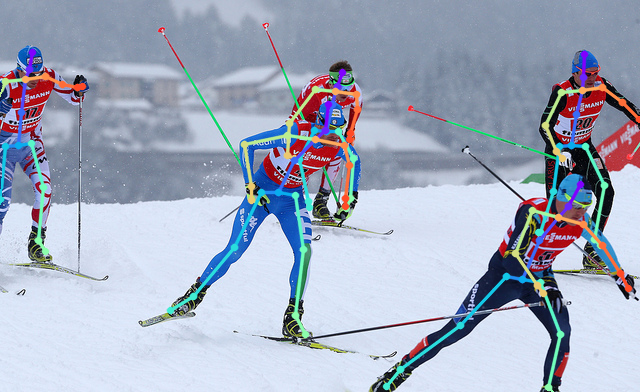

In [ ]:
import sys
import os
import os.path as osp
import argparse
import numpy as np
import cv2
import torch
import torchvision.transforms as transforms
from torch.nn.parallel.data_parallel import DataParallel
import torch.backends.cudnn as cudnn

sys.path.insert(0, osp.join('..', 'main'))
sys.path.insert(0, osp.join('..', 'data'))
sys.path.insert(0, osp.join('..', 'common'))

from importlib import reload  
# from config import cfg
import config
reload(config)

# from model import get_pose_net
import model
reload(model)
# import dataset_n.generate_patch_image

from utils.pose_utils import process_bbox, pixel2cam
from utils.vis import vis_keypoints#,vis_3d_multiple_skeleton
from google.colab.patches import cv2_imshow


# argument parsing

cfg = config.cfg
cfg.set_args('0')
cudnn.benchmark = True

# MuCo joint set
joint_num = 21
joints_name = ('Head_top', 'Thorax', 'R_Shoulder', 'R_Elbow', 'R_Wrist', 'L_Shoulder', 'L_Elbow', 'L_Wrist', 'R_Hip', 'R_Knee', 'R_Ankle', 'L_Hip', 'L_Knee', 'L_Ankle', 'Pelvis', 'Spine', 'Head', 'R_Hand', 'L_Hand', 'R_Toe', 'L_Toe')
flip_pairs = ( (2, 5), (3, 6), (4, 7), (8, 11), (9, 12), (10, 13), (17, 18), (19, 20) )
skeleton = ( (0, 16), (16, 1), (1, 15), (15, 14), (14, 8), (14, 11), (8, 9), (9, 10), (10, 19), (11, 12), (12, 13), (13, 20), (1, 2), (2, 3), (3, 4), (4, 17), (1, 5), (5, 6), (6, 7), (7, 18) )

# snapshot load
model_path = './snapshot_%d.pth.tar' % int(24)
assert osp.exists(model_path), 'Cannot find model at ' + model_path
print('Load checkpoint from {}'.format(model_path))
model = model.get_pose_net(cfg, False, joint_num)
model = DataParallel(model).cuda()
ckpt = torch.load(model_path)
model.load_state_dict(ckpt['network'])
model.eval()

# prepare input image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=cfg.pixel_mean, std=cfg.pixel_std)])
# img_path = 'input4.jpg'
# original_img = cv2.imread(img_path)
original_img_height, original_img_width = original_img.shape[:2]

# prepare bbox
# bbox_list = from Yolo
root_depth_list = root_params #from ROONET
assert len(bbox_list) == len(root_depth_list)
person_num = len(bbox_list)

# normalized camera intrinsics
focal = [1500, 1500] # x-axis, y-axis
princpt = [original_img_width/2, original_img_height/2] # x-axis, y-axis
print('focal length: (' + str(focal[0]) + ', ' + str(focal[1]) + ')')
print('principal points: (' + str(princpt[0]) + ', ' + str(princpt[1]) + ')')

# for each cropped and resized human image, forward it to PoseNet
output_pose_2d_list = []
output_pose_3d_list = []
for n in range(person_num):
    bbox = process_bbox(np.array(bbox_list[n]), original_img_width, original_img_height)
    img, img2bb_trans = generate_patch_image(original_img, bbox, False, 1.0, 0.0, False) 
    img = transform(img).cuda()[None,:,:,:]

    # forward
    with torch.no_grad():
        pose_3d = model(img) # x,y: pixel, z: root-relative depth (mm)

    # inverse affine transform (restore the crop and resize)
    pose_3d = pose_3d[0].cpu().numpy()
    pose_3d[:,0] = pose_3d[:,0] / cfg.output_shape[1] * cfg.input_shape[1]
    pose_3d[:,1] = pose_3d[:,1] / cfg.output_shape[0] * cfg.input_shape[0]
    pose_3d_xy1 = np.concatenate((pose_3d[:,:2], np.ones_like(pose_3d[:,:1])),1)
    img2bb_trans_001 = np.concatenate((img2bb_trans, np.array([0,0,1]).reshape(1,3)))
    pose_3d[:,:2] = np.dot(np.linalg.inv(img2bb_trans_001), pose_3d_xy1.transpose(1,0)).transpose(1,0)[:,:2]
    output_pose_2d_list.append(pose_3d[:,:2].copy())
    
    # root-relative discretized depth -> absolute continuous depth
    pose_3d[:,2] = (pose_3d[:,2] / cfg.depth_dim * 2 - 1) * (cfg.bbox_3d_shape[0]/2) + root_depth_list[n]
    pose_3d = pixel2cam(pose_3d, focal, princpt)
    output_pose_3d_list.append(pose_3d.copy())

# visualize 2d poses
vis_img = original_img.copy()
for n in range(person_num):
    vis_kps = np.zeros((3,joint_num))
    vis_kps[0,:] = output_pose_2d_list[n][:,0]
    vis_kps[1,:] = output_pose_2d_list[n][:,1]
    vis_kps[2,:] = 1
    vis_img = vis_keypoints(vis_img, vis_kps, skeleton)
cv2.imwrite('output_pose_2d.jpg', vis_img)
cv2_imshow(vis_img)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

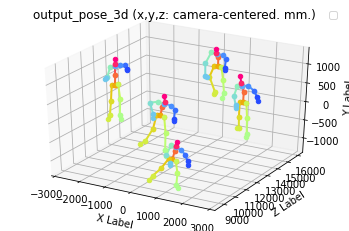

In [ ]:
### visualize 3d poses
vis_kps = np.array(output_pose_3d_list)
vis_3d_multiple_skeleton(vis_kps, np.ones_like(vis_kps), skeleton, 'output_pose_3d (x,y,z: camera-centered. mm.)')
